# Exeercise Notebook - class 5

## Medical cost regression analysis

 We will create and test a linear regression model that estimate the annual premiums of 1338 people based on their other information. We will discuss the results and  perform visualization using various data in dataset.

 This notebook was adapted from: https://www.kaggle.com/code/fastsystem/medical-cost-eda-and-regression-analysis/notebook
 

## Import Packages

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Load Dataset

In [9]:
data = pd.read_csv("data/insurance.csv")  # Read CSV file and load into "data" variable

In [10]:
data.info()  # Show detailed information for dataset columns(attributes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
# another way of looking to the size of the dataset
data.shape

(1338, 7)

In [12]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print(missing_values)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


**Insights about the dataset:**

There are 1338 rows and 7 columns(attributes) without any missing values.
- age : Indicates the age of the person. It contains numeric data ("int64").
- sex : It refers to the gender of the person. It contains categoric data ("object").
- bmi : It refers to the Body Mass Index of the person and contains numeric data ("float64").
- children : It refers to the number of children that a person has. It contains numeric data ("int64").
- smoker : Indicates whether the person smokes or not. It contains categoric data ("object").
- region : Specifies which region the person is from. It contains categoric data ("object").
- charges : The person's total insurance premium is specified. Although not specified, it is assumed to be in dollars ($). It contains numeric data ("float64").

## EDA - Exploratory Data Analysis

### Exploring the dataset

In [13]:
# Let's explore the first 5 rows of the dataset
data.head() # by default the head() function considers 5 rows.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
# the first 10 rows of the dataset
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [15]:
# Now, see the first 20 rows of the dataset
# ....

In [16]:
# Let's explore the last 5 rows of the dataset
data.tail() # by default the tail() function considers 5 rows.

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [17]:
# Now, compute the last 10 rows
# ....

### Descriptive analysis

In [18]:
# Let's compute the summary statistics of the dataset
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Note that this function only works with the numeric variables...

And in case we want only to evaluate the mean age of the people in the dataset....

In [20]:
# pandas package have also some functions implemented like, mean(), median(), min(), max(), ...
data['age'].mean()

39.20702541106129

In [21]:
# Now, compute the mean bmi of the people in the dataset
# ....

In [22]:
# In case we want the max number of children? Let's use max function
data['children'].max()

5

In [ ]:
# And what is the min age value in th dataset
# data['age']...

What about the correlation of the variables?

In [38]:
# It only works for numeric variables...
correlation_matrix = data[['age','bmi','children','charges']].corr()
correlation_matrix

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


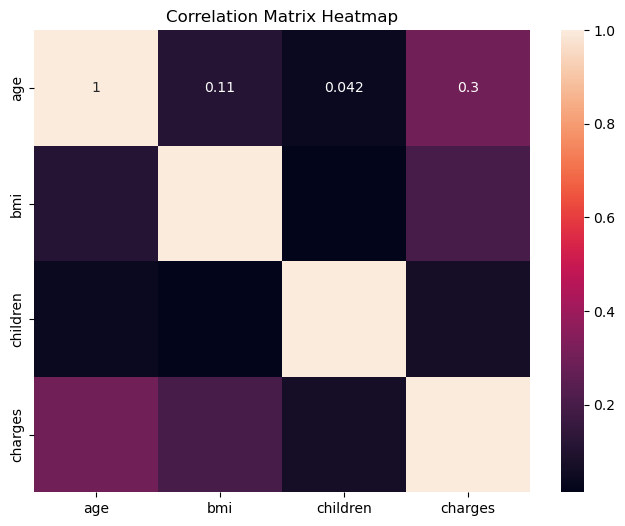

In [42]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True)

# Adding titles and labels
plt.title('Correlation Matrix Heatmap')
plt.show()

We can also visualize the distribution of the variables

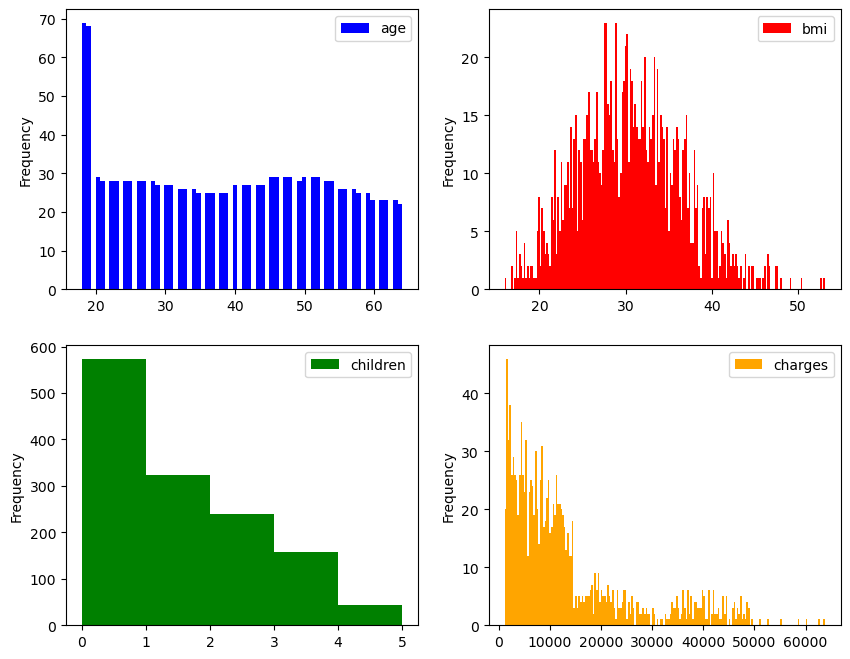

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
data.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
data.plot(kind="hist", y="bmi", bins=200, color="r", ax=axes[0][1])
data.plot(kind="hist", y="children", bins=5, color="g", ax=axes[1][0])
data.plot(kind="hist", y="charges", bins=200, color="orange", ax=axes[1][1])
plt.show()

And for categoric variables?

In [27]:
# we can get their counts
data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

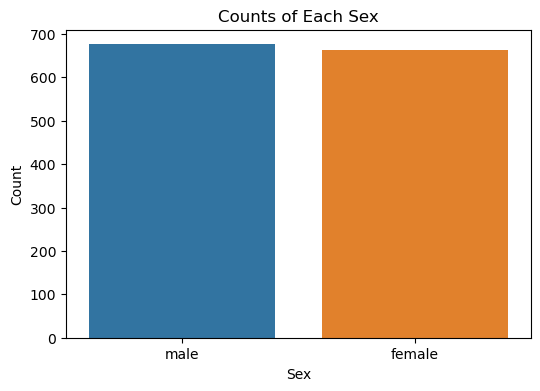

In [31]:
# Count the values
counts = data['sex'].value_counts()

# Plot the counts using a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=counts.index, y=counts.values)

# Adding titles and labels
plt.title('Counts of Each Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [28]:
# we can get their counts
data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

Now, change the code below to get the plot of smoker counts

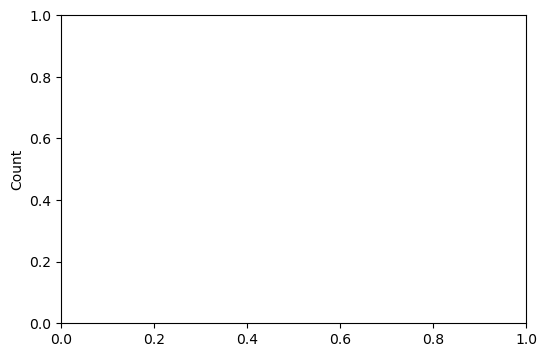

In [45]:
#counts = data['...'].value_counts()

# Plot the counts using a bar plot
plt.figure(figsize=(6, 4))
#sns.barplot(x=counts.index, y=counts.values)

# Adding titles and labels
#plt.title('Counts of ...')
#plt.xlabel('...')
plt.ylabel('Count')
plt.show()

Since the value we will examine as an output here is "charges", it is also interesting to examine the relationship of the other columns with it. To do this, let's draw Scatter Plots between the numeric columns and the "charges" column:

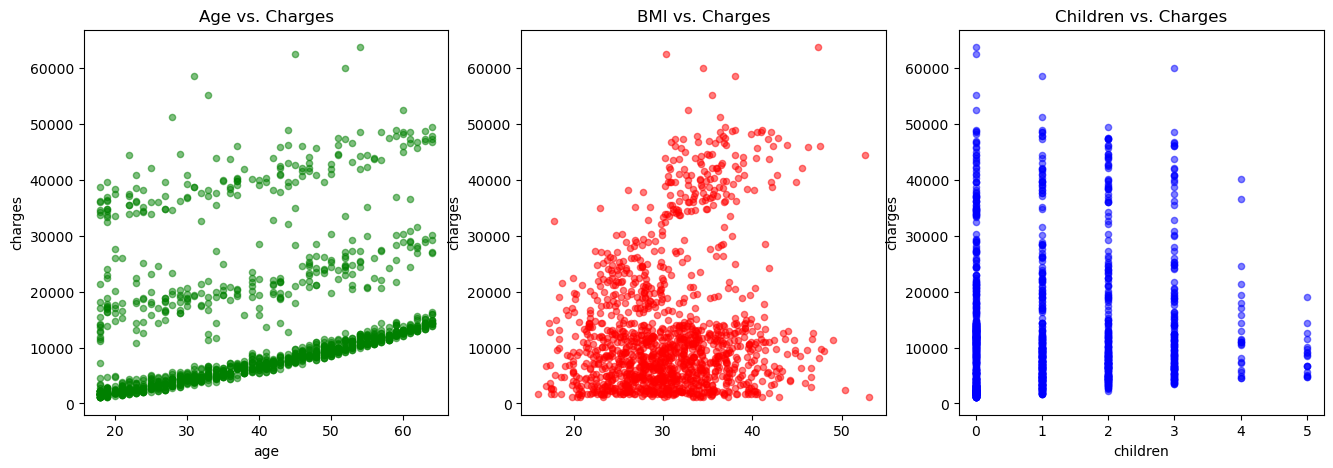

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
data.plot(kind='scatter', x='age', y='charges', alpha=0.5, color='green', ax=axes[0], title="Age vs. Charges")
data.plot(kind='scatter', x='bmi', y='charges', alpha=0.5, color='red', ax=axes[1], title="BMI vs. Charges")
data.plot(kind='scatter', x='children', y='charges', alpha=0.5, color='blue', ax=axes[2], title="Children vs. Charges")
plt.show()

Finally, we can look at the distribution of smokers and non-smokers in the BMI vs. Charges Scatter Plot:

<Axes: xlabel='bmi', ylabel='charges'>

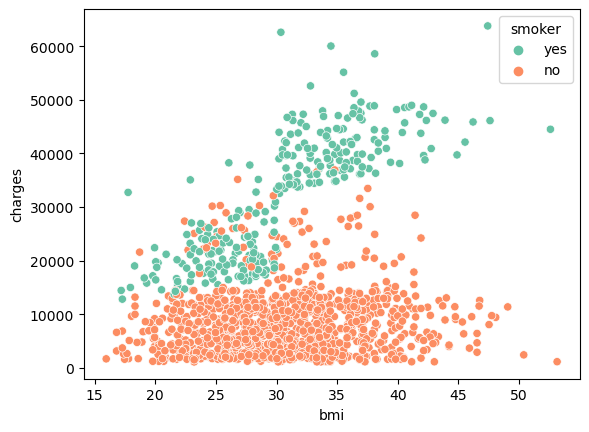

In [50]:
sns.scatterplot(x="bmi", y="charges", data=data, palette='Set2', hue='smoker')

## Model Train

## Model Evaluation

## Model Coefficients Interpretation